In [1]:
import re
import nltk
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs


In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/dp/B0BFFYCJQJ?ref=cm_sw_r_cso_wa_apan_dp_V7PNJVVXDJHASN0WNZ26&ref_=cm_sw_r_cso_wa_apan_dp_V7PNJVVXDJHASN0WNZ26&social_share=cm_sw_r_cso_wa_apan_dp_V7PNJVVXDJHASN0WNZ26&starsLeft=1&skipTwisterOG=2&th=1',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(6)):
    soup = get_soup(f'https://www.amazon.in/Ultrahuman-M1-Glucose-Monitoring-FreeStyle/product-reviews/B0BFFYCJQJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\bhave\AppData\Local\Temp\ipykernel_1612\3195361741.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(6)):


  0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,Reviewed in India on 14 January 2024
1,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,Reviewed in India on 27 May 2023
2,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,Reviewed in India on 18 April 2024
3,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,Reviewed in India on 30 August 2023
4,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,Reviewed in India on 8 April 2024


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,14 January 2024
1,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,27 May 2023
2,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,18 April 2024
3,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,30 August 2023
4,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,8 April 2024


In [9]:
df.to_csv("Product_Review.csv")

In [10]:
reviews = pd.read_csv('Product_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,14 January 2024
1,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,27 May 2023
2,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,18 April 2024
3,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,30 August 2023
4,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,8 April 2024


In [11]:
reviews.Rating.describe()

count    60.000000
mean      3.350000
std       1.857874
min       1.000000
25%       1.000000
50%       4.500000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        60 non-null     object 
 1   Rating       60 non-null     float64
 2   Review       60 non-null     object 
 3   Review_Date  60 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.0+ KB


In [13]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [14]:
reviews.isnull().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [15]:
reviews[reviews.duplicated()]

,Title,Rating,Review,Review_Date
10,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,14 January 2024
11,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,27 May 2023
12,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,18 April 2024
13,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,30 August 2023
14,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,8 April 2024
15,1.0 out of 5 stars\nMalpractice - expired sens...,1.0,Received package on 31st March 2024 with Frees...,7 April 2024
16,5.0 out of 5 stars\nBiohack,5.0,First time user of this magical device. It is ...,19 March 2024
17,3.0 out of 5 stars\nAbbott sensor cartridge al...,3.0,Sensor cartridge already in fired position out...,23 March 2024
18,2.0 out of 5 stars\nSensor not working,2.0,The media could not be loaded.\n ...,25 March 2024
19,4.0 out of 5 stars\nGood to try it out to chec...,4.0,I have completed 15 days and now I have a fair...,28 September 2023


In [16]:
reviews=reviews.drop_duplicates().reset_index(drop=True)


In [17]:
reviews.insert(0,'Id',range(0,0 + len(reviews)))



In [18]:
reviews

,Id,Title,Rating,Review,Review_Date
0,0,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,14 January 2024
1,1,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,27 May 2023
2,2,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,18 April 2024
3,3,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,30 August 2023
4,4,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,8 April 2024
5,5,1.0 out of 5 stars\nMalpractice - expired sens...,1.0,Received package on 31st March 2024 with Frees...,7 April 2024
6,6,5.0 out of 5 stars\nBiohack,5.0,First time user of this magical device. It is ...,19 March 2024
7,7,3.0 out of 5 stars\nAbbott sensor cartridge al...,3.0,Sensor cartridge already in fired position out...,23 March 2024
8,8,2.0 out of 5 stars\nSensor not working,2.0,The media could not be loaded.\n ...,25 March 2024
9,9,4.0 out of 5 stars\nGood to try it out to chec...,4.0,I have completed 15 days and now I have a fair...,28 September 2023


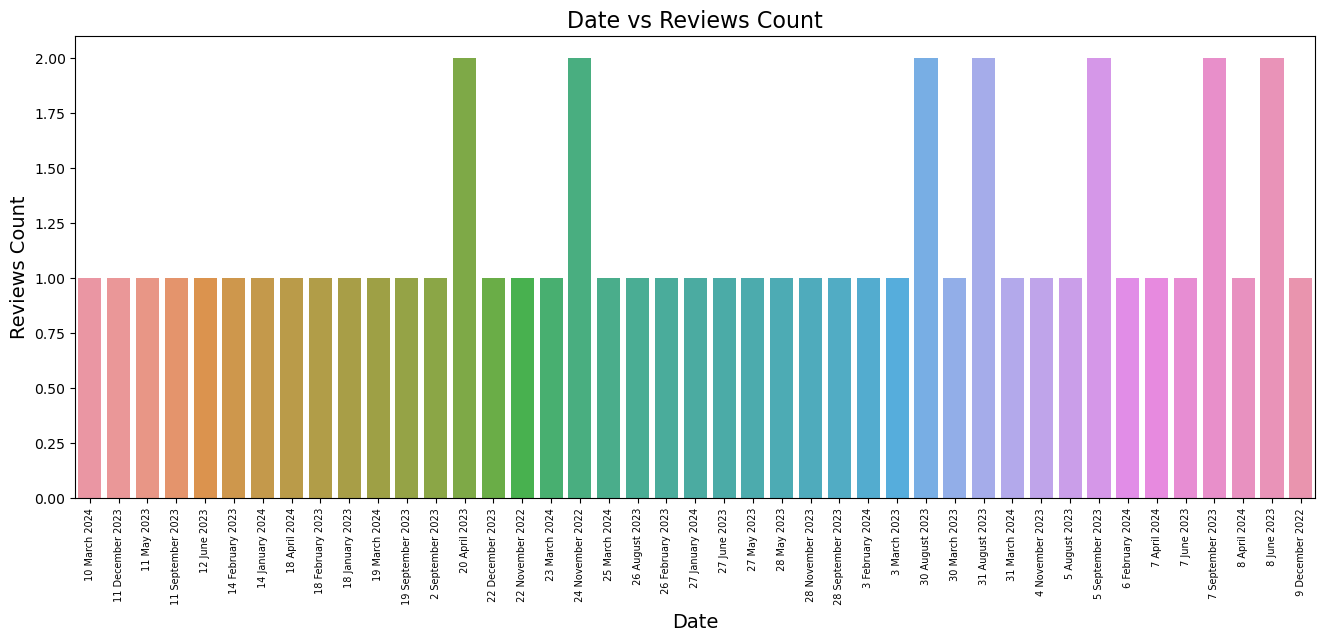

In [19]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

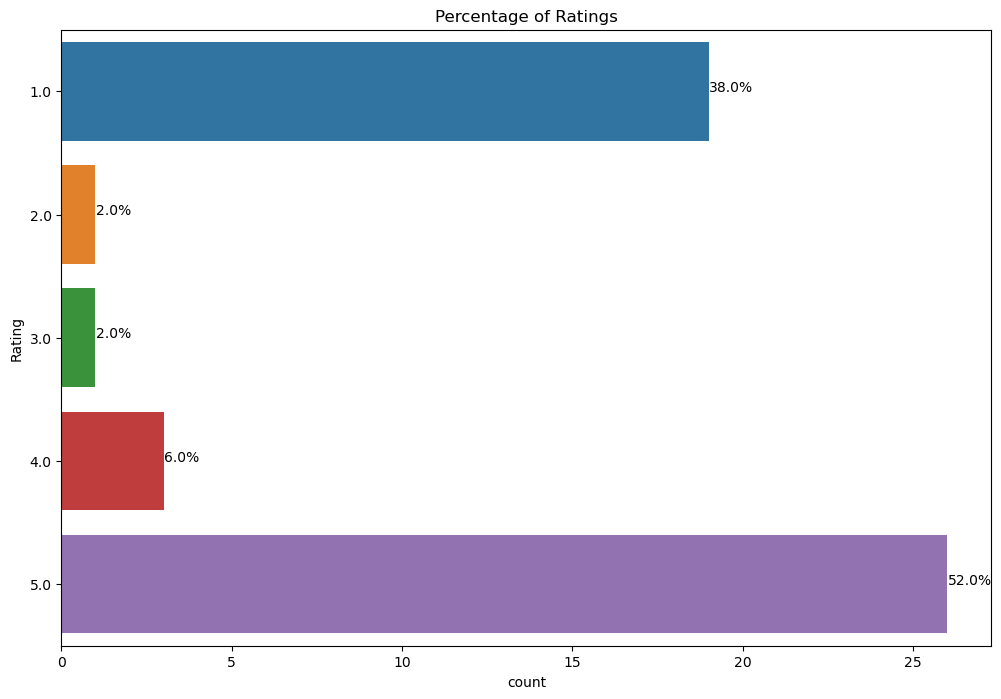

In [20]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

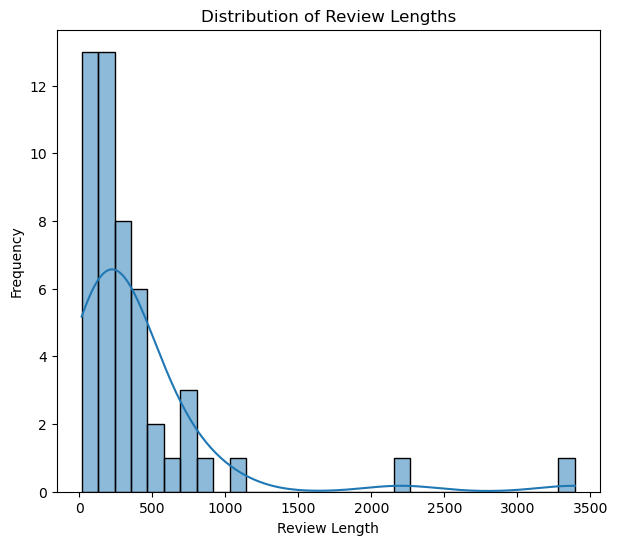

In [21]:
# Plot the distribution of review lengths
review_lengths = reviews['Review'].str.len()
plt.figure(figsize=(7, 6))
sns.histplot(review_lengths, bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [22]:
# NLTK

example = reviews['Review'][5]
print(example)

Received package on 31st March 2024 with Freestyle Libre sensor package reading expiry of March 2024 rendering it useless to install.Being non-returnable, this is a reportable malpractice.Hope Ultraguman takes note of the same.


In [23]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Received',
 'package',
 'on',
 '31st',
 'March',
 '2024',
 'with',
 'Freestyle',
 'Libre',
 'sensor']

In [24]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Received', 'VBN'),
 ('package', 'NN'),
 ('on', 'IN'),
 ('31st', 'CD'),
 ('March', 'NNP'),
 ('2024', 'CD'),
 ('with', 'IN'),
 ('Freestyle', 'NNP'),
 ('Libre', 'NNP'),
 ('sensor', 'NN')]

In [25]:
# >>> nltk.download()


In [26]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Received/VBN
  package/NN
  on/IN
  31st/CD
  March/NNP
  2024/CD
  with/IN
  (PERSON Freestyle/NNP Libre/NNP)
  sensor/NN
  package/NN
  reading/VBG
  expiry/NN
  of/IN
  March/NNP
  2024/CD
  rendering/VBG
  it/PRP
  useless/JJ
  to/TO
  install.Being/VBG
  non-returnable/JJ
  ,/,
  this/DT
  is/VBZ
  a/DT
  reportable/JJ
  malpractice.Hope/NN
  (PERSON Ultraguman/NNP)
  takes/VBZ
  note/NN
  of/IN
  the/DT
  same/JJ
  ./.)


Step 1. VADER Seniment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [28]:
sia.polarity_scores(example)

{'neg': 0.081, 'neu': 0.87, 'pos': 0.049, 'compound': -0.2732}

In [29]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

In [30]:
vaders = pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(reviews,how='left')


In [31]:
vaders

,Id,neg,neu,pos,compound,Title,Rating,Review,Review_Date
0,0,0.000,0.856,0.144,0.9696,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,14 January 2024
1,1,0.173,0.698,0.130,-0.9020,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,27 May 2023
2,2,0.064,0.676,0.260,0.8622,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,18 April 2024
3,3,0.042,0.921,0.037,-0.0772,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,30 August 2023
4,4,0.093,0.684,0.224,0.5034,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,8 April 2024
5,5,0.081,0.870,0.049,-0.2732,1.0 out of 5 stars\nMalpractice - expired sens...,1.0,Received package on 31st March 2024 with Frees...,7 April 2024
6,6,0.063,0.796,0.141,0.7650,5.0 out of 5 stars\nBiohack,5.0,First time user of this magical device. It is ...,19 March 2024
7,7,0.092,0.734,0.174,0.5037,3.0 out of 5 stars\nAbbott sensor cartridge al...,3.0,Sensor cartridge already in fired position out...,23 March 2024
8,8,0.000,1.000,0.000,0.0000,2.0 out of 5 stars\nSensor not working,2.0,The media could not be loaded.\n ...,25 March 2024
9,9,0.062,0.898,0.041,-0.1280,4.0 out of 5 stars\nGood to try it out to chec...,4.0,I have completed 15 days and now I have a fair...,28 September 2023


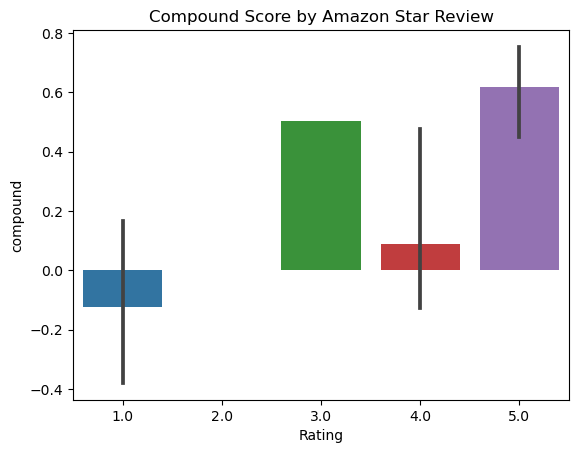

In [32]:
# plot VADERS

ax = sns. barplot(data=vaders,x='Rating',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

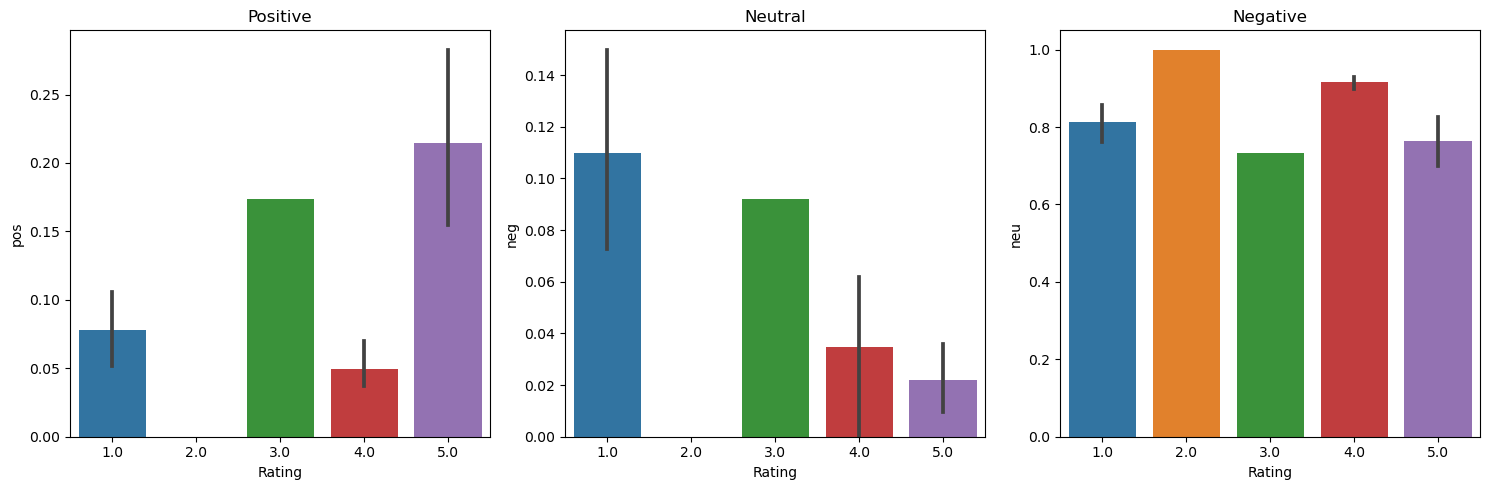

In [33]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
sns. barplot(data=vaders,x='Rating',y='pos',ax=axs[0])
sns. barplot(data=vaders,x='Rating',y='neg',ax=axs[1])
sns. barplot(data=vaders,x='Rating',y='neu',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [34]:
# Roberta Pretrained model

#!pip install transformers

In [35]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [37]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\bhave\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [38]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Received package on 31st March 2024 with Freestyle Libre sensor package reading expiry of March 2024 rendering it useless to install.Being non-returnable, this is a reportable malpractice.Hope Ultraguman takes note of the same.


{'neg': 0.081, 'neu': 0.87, 'pos': 0.049, 'compound': -0.2732}

In [39]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='tf')
output = model(**encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.8493108, 'roberta_neu': 0.13920872, 'roberta_pos': 0.011480504}


In [40]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='tf')
    output = model(**encoded_text)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [41]:
# dropping 48th row bacause of error in roberta model due to review text is too long
reviews.drop([48],inplace=True)

In [42]:
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:    
        text = row['Review']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid]=both
    except NameError:
        print(f'Broke for id{myid}')   
        
        
      

  0%|          | 0/49 [00:00<?, ?it/s]

In [43]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(reviews, how='left')

In [44]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Title,Rating,Review,Review_Date
0,0,0.000,0.856,0.144,0.9696,0.005666,0.042346,0.951988,5.0 out of 5 stars\nOne of the best CGM and ap...,5.0,The user interface of the app is fantastic and...,14 January 2024
1,1,0.173,0.698,0.130,-0.9020,0.704449,0.245687,0.049865,1.0 out of 5 stars\nUltraHuman is an UltraScam...,1.0,I bought it and after the first reading when I...,27 May 2023
2,2,0.064,0.676,0.260,0.8622,0.017517,0.049540,0.932942,5.0 out of 5 stars\nAmazing and its a blessing,5.0,Worked wonders. This is amazing. I am now in c...,18 April 2024
3,3,0.042,0.921,0.037,-0.0772,0.013780,0.189702,0.796518,4.0 out of 5 stars\nGood for tracking glucose ...,4.0,Been using Ultrahuman app for checking glucose...,30 August 2023
4,4,0.093,0.684,0.224,0.5034,0.003454,0.105484,0.891062,5.0 out of 5 stars\nAccuracy,5.0,Highly accurate. Very useful and a must for a...,8 April 2024


In [45]:
# compare Score between models
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Title', 'Rating',
       'Review', 'Review_Date'],
      dtype='object')

c:\Users\bhave\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


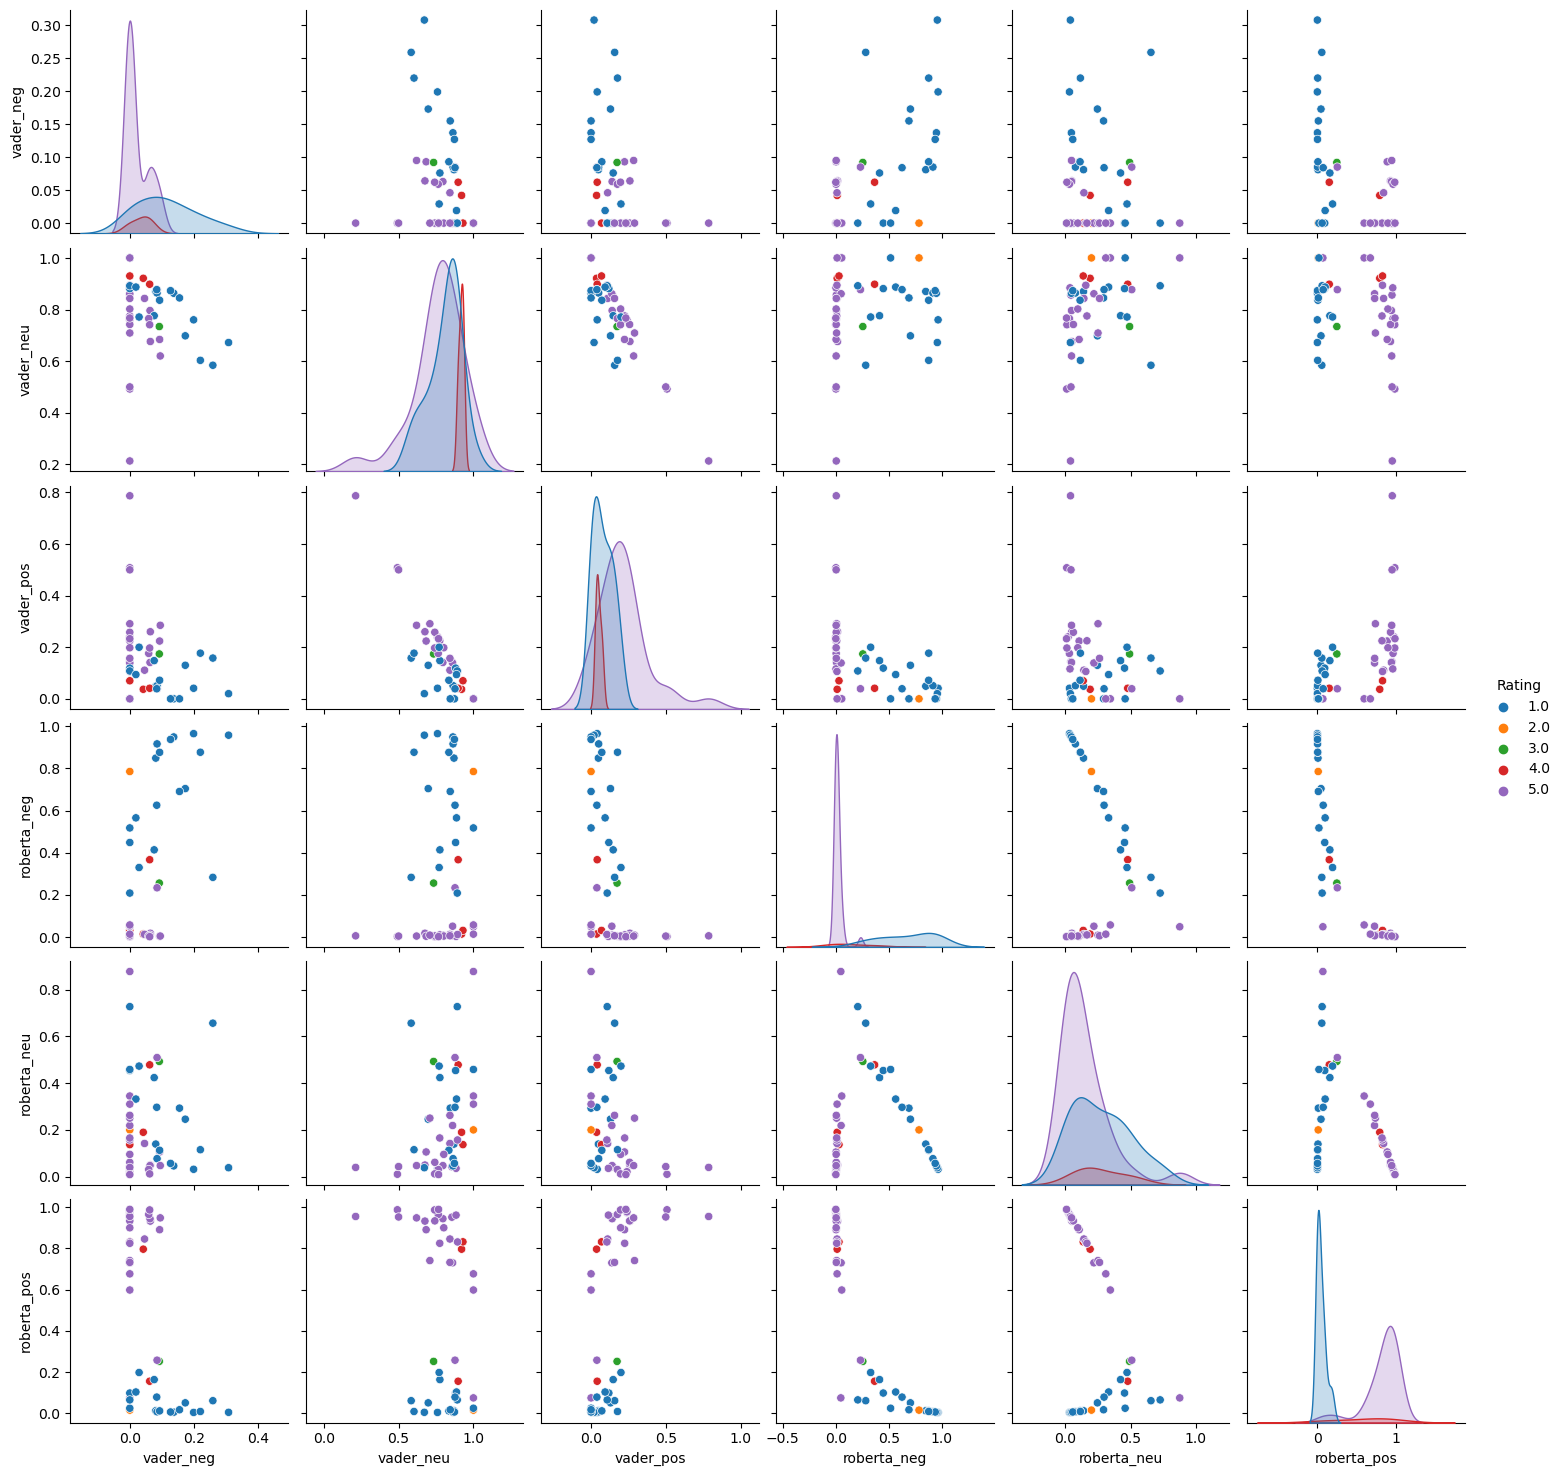

In [46]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [47]:
results_df.query('Rating == 1') .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'The reliability of this product may/may not be good. Moreover, if any products have to be a success, they don\'t have to be very expensive just like the English used on their website. People can get results from a smart watch or blood sugar checking machine. These companies are established by the ultra rich "Americans" and caters to a meagre minority present in india. There are tremendous successful products established by the IITians/NITians/tier 1 colleges. My English may not be as good as the founders/staff of the company. But speaking top notch English doesn\'t relate to success. It related to a mirage of success.'

In [48]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

'The reliability of this product may/may not be good. Moreover, if any products have to be a success, they don\'t have to be very expensive just like the English used on their website. People can get results from a smart watch or blood sugar checking machine. These companies are established by the ultra rich "Americans" and caters to a meagre minority present in india. There are tremendous successful products established by the IITians/NITians/tier 1 colleges. My English may not be as good as the founders/staff of the company. But speaking top notch English doesn\'t relate to success. It related to a mirage of success.'

In [49]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

"I have known for a long time that it was not good to consume a lot of simple sugars & carbs, but there is no perfect way to see the actual impact of consuming them. Ultrahuman M1 helped me realize how I was indulging in mindless big meal portions and drinking tea throughout my life. Food Score was a real game changer that helped me to reduce 2-3 cups of tea daily, cut my chapati portions, make me walk post-meal & have an early dinner. I have also learned why I was not productive throughout the day due to multiple glucose spikes & crashes. Anybody who wants to understand their food choices & lifestyle, don't think twice and just go for it. Learn, modify behaviors and reassess is my Mantra."

In [50]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

'Have been using for 6 months now. Lost 5 kgs with the help of Ultrahuman M1. Premium brand, love it'

In [51]:
# get transformers version
import transformers
print(transformers.__version__)

4.37.2


In [52]:
#pip install -U transformers

In [53]:
from transformers import pipeline
pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\bhave\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [54]:
pipeline('bad')

[{'label': 'NEGATIVE', 'score': 0.999782383441925}]